In [1]:
import addons
import numpy as np
import pandas as pd 
import os
import helpers
import random
import math
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation

/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [15]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))


name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
pop_activities = np.zeros((len(list_dirs),num_pops,len(test)))
times = np.zeros((len(list_dirs),num_pops,len(test)))

for i in range(len(list_dirs)):
    name =  "data_background_rate_jesus/" + list_dirs[i] + '/trial_0/measurements/pop_activities/'
    name_times = "data_background_rate_jesus/" + list_dirs[i] + '/trial_0/measurements/times/'
    for j in range(num_pops):
        pop_activities[i][j][:] = np.loadtxt(name+'pop_activity_' + str(j) + '.dat')
        times[i][j][:] = np.loadtxt(name_times+'times_' + str(j) + '.dat',skiprows=1)

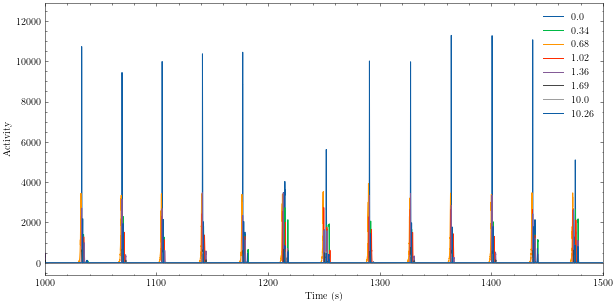

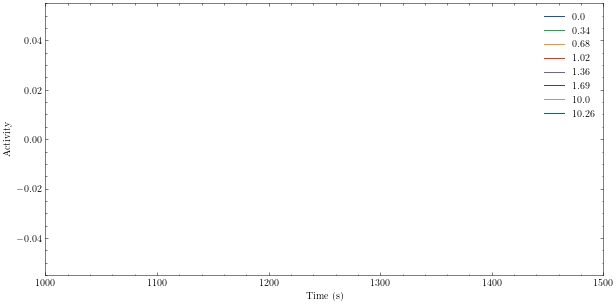

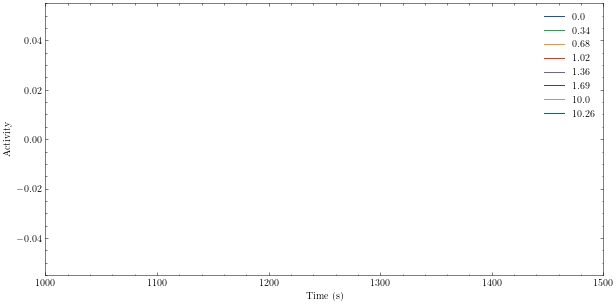

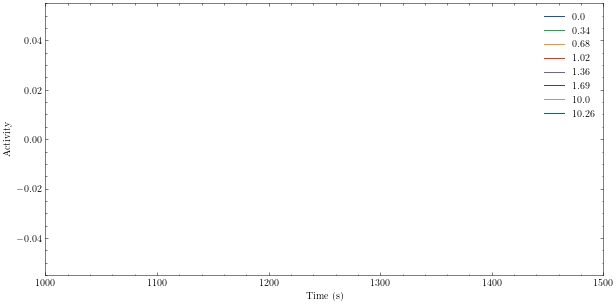

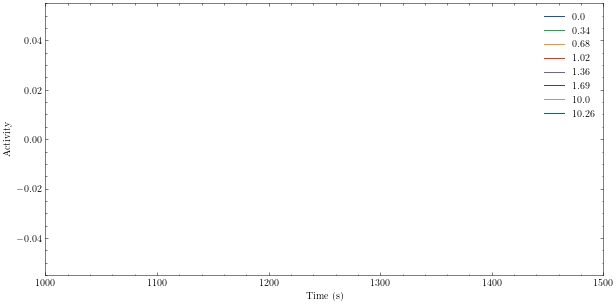

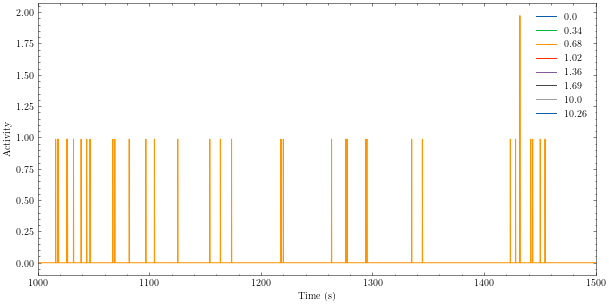

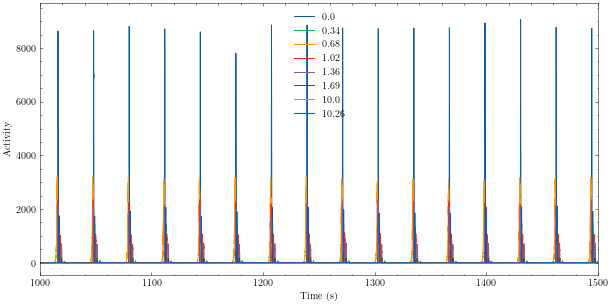

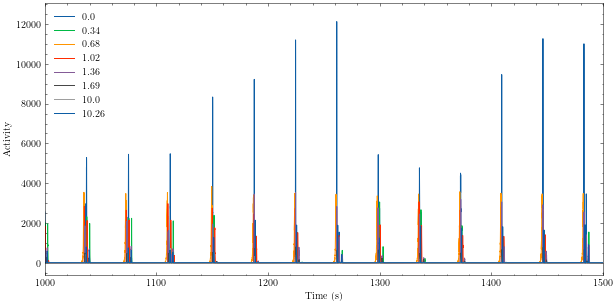

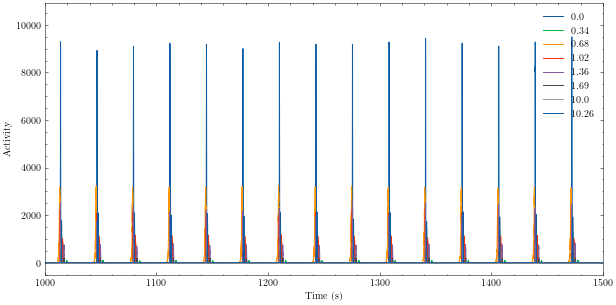

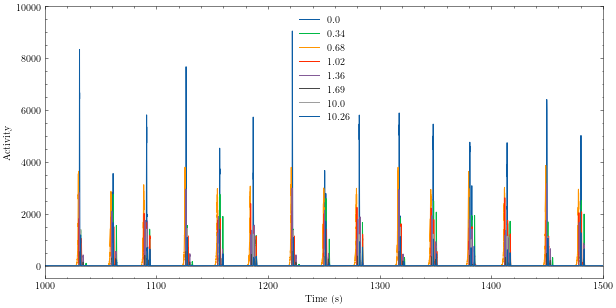

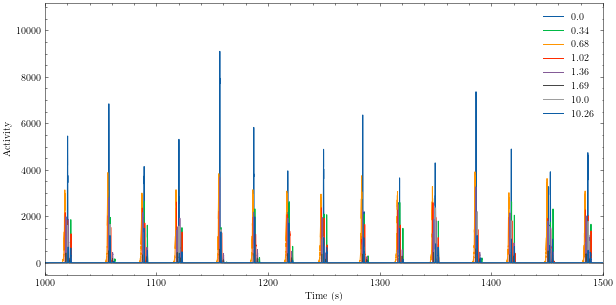

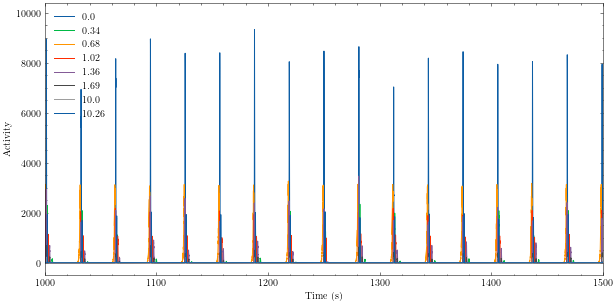

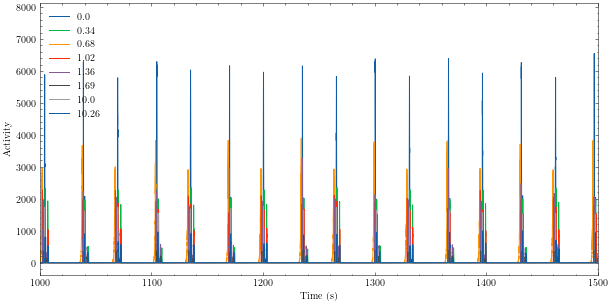

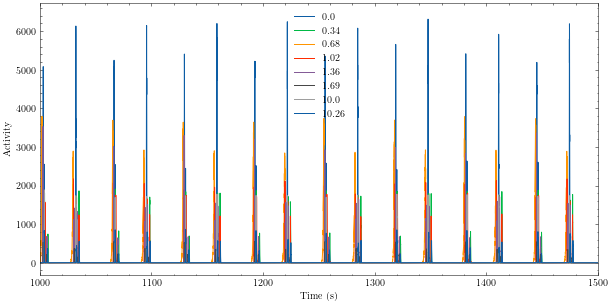

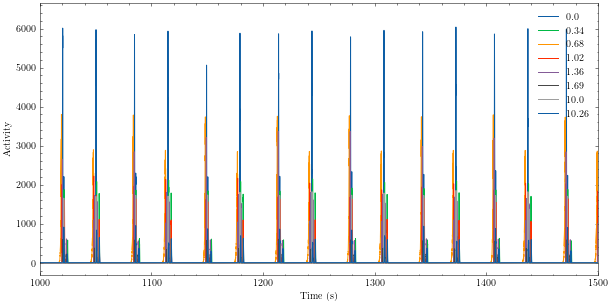

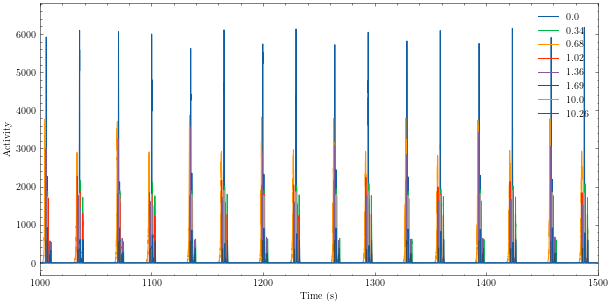

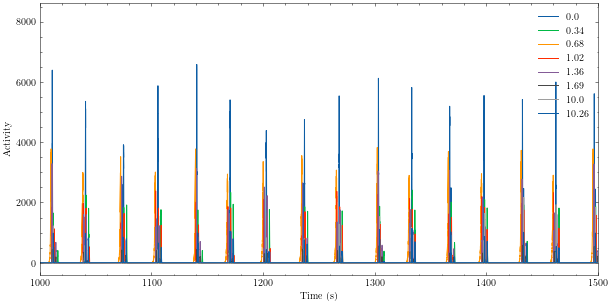

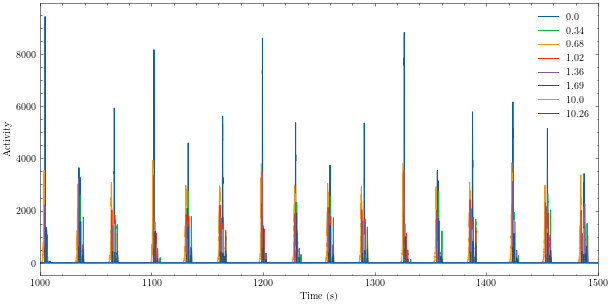

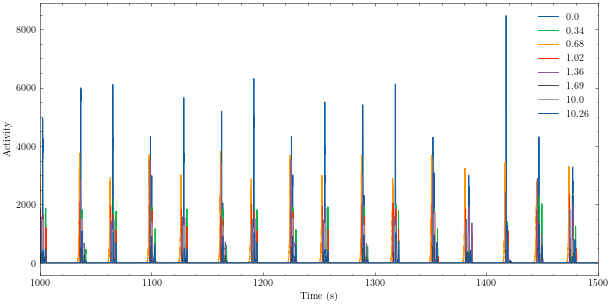

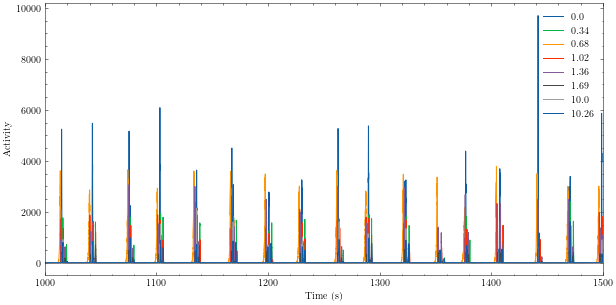

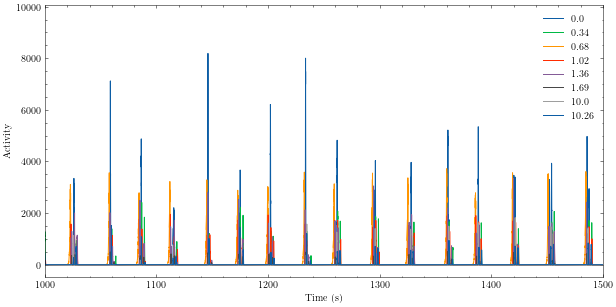

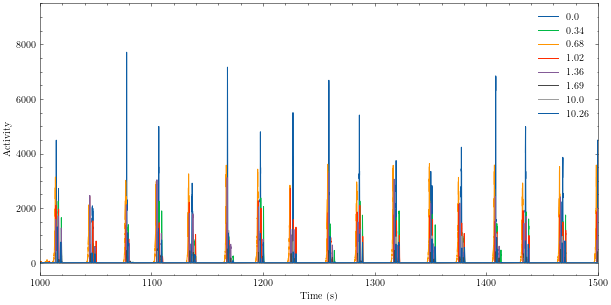

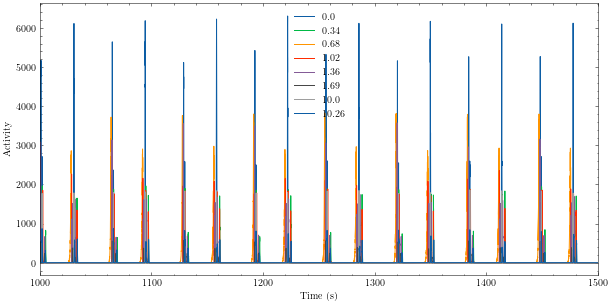

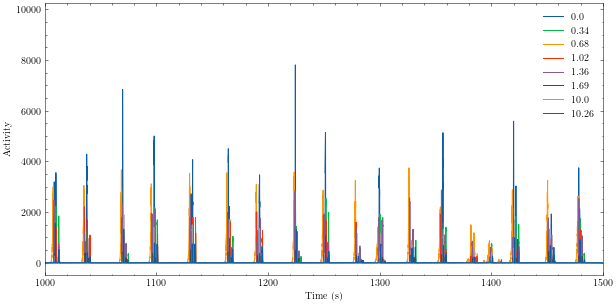

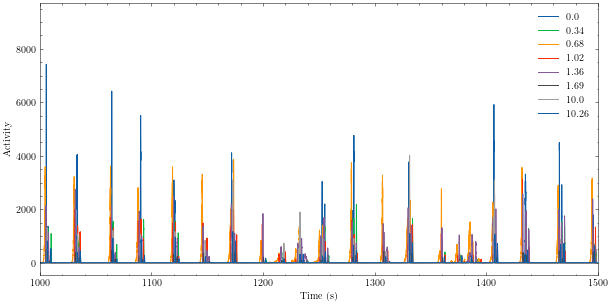

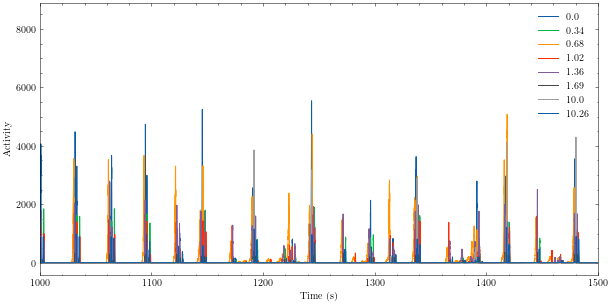

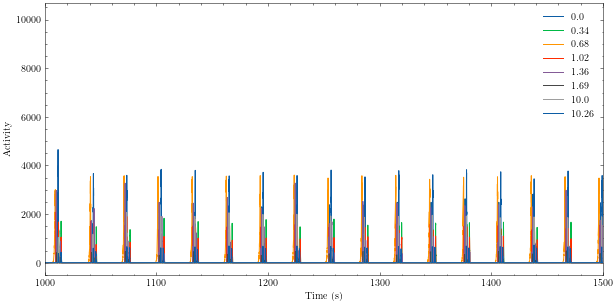

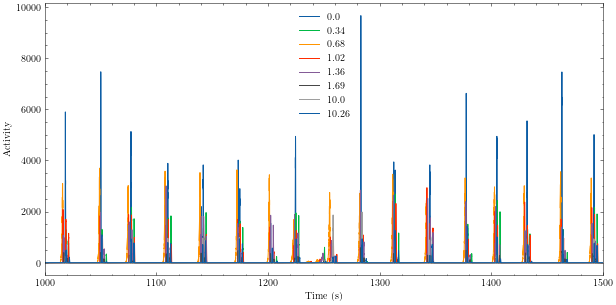

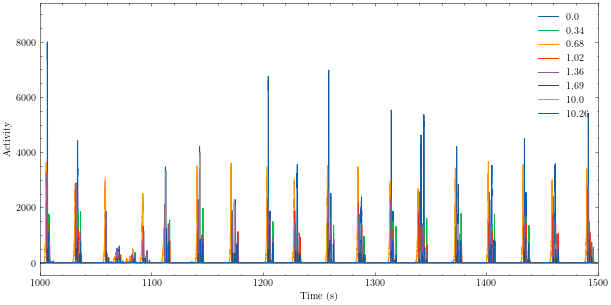

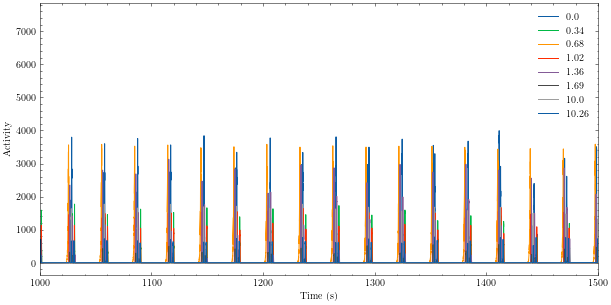

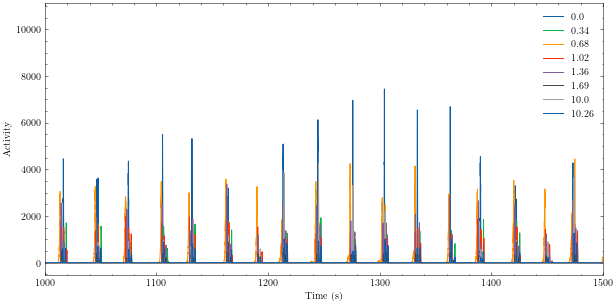

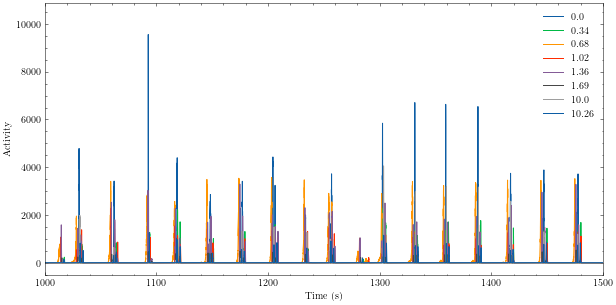

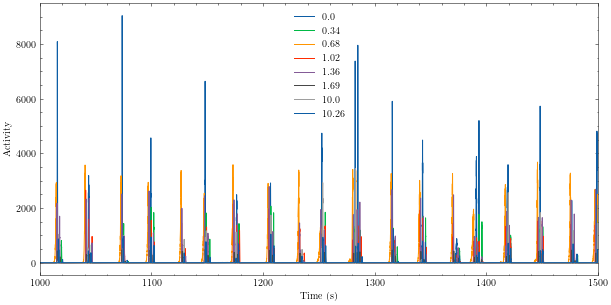

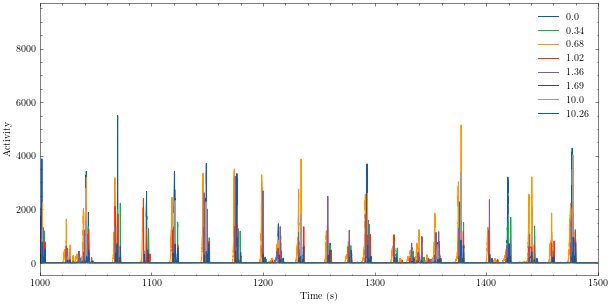

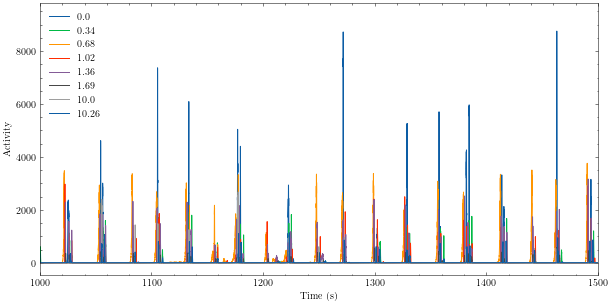

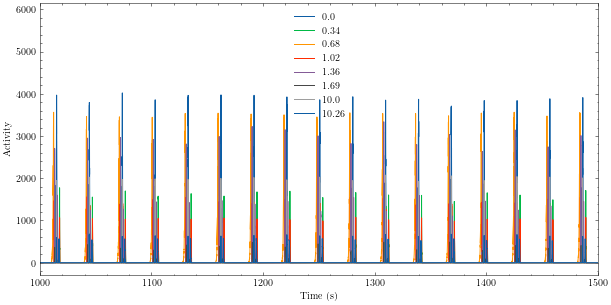

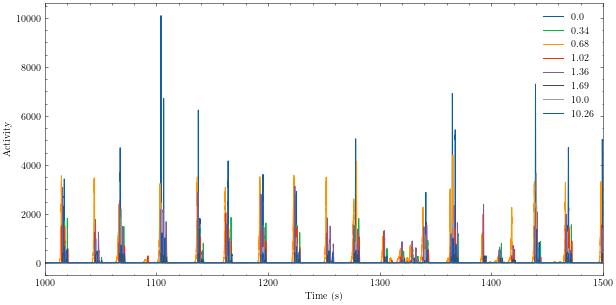

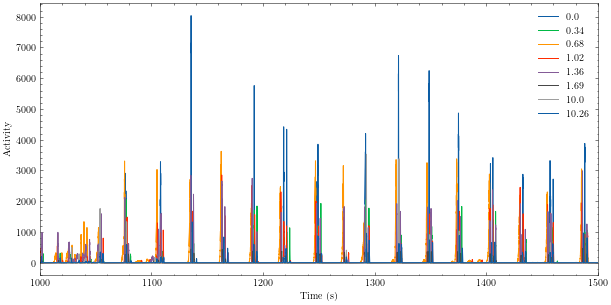

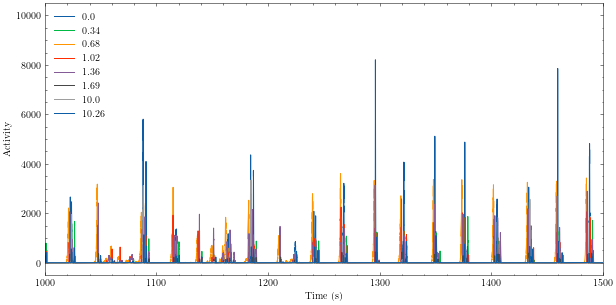

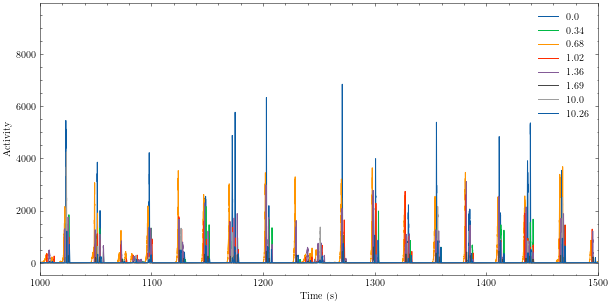

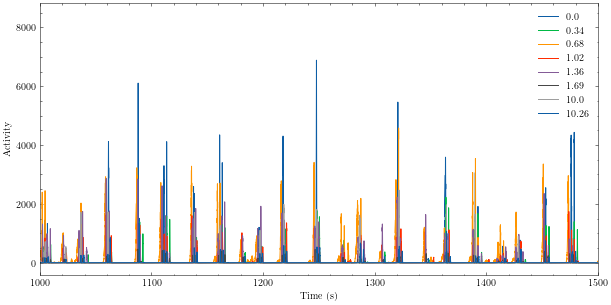

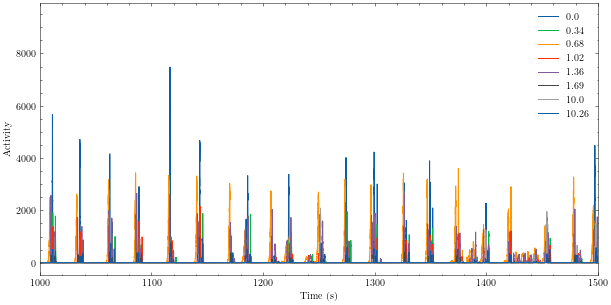

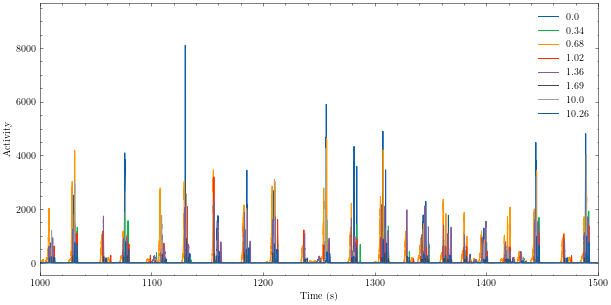

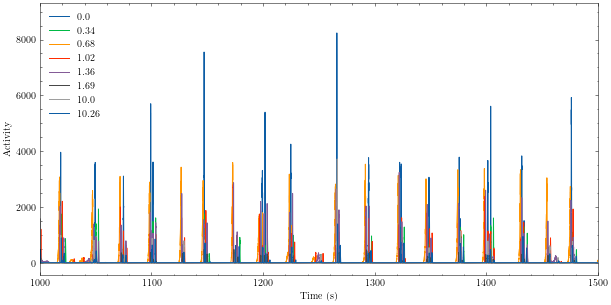

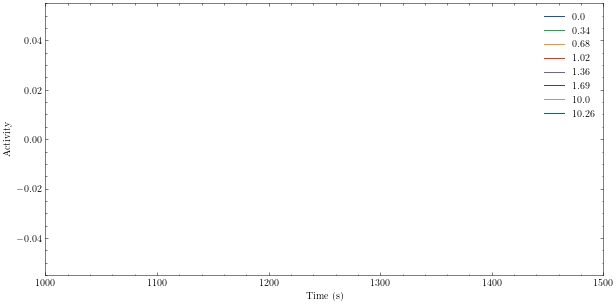

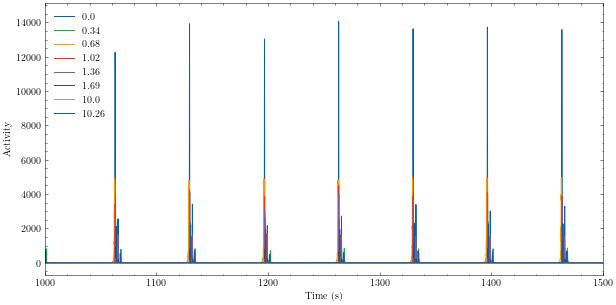

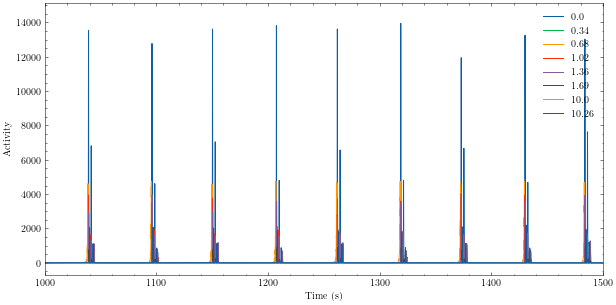

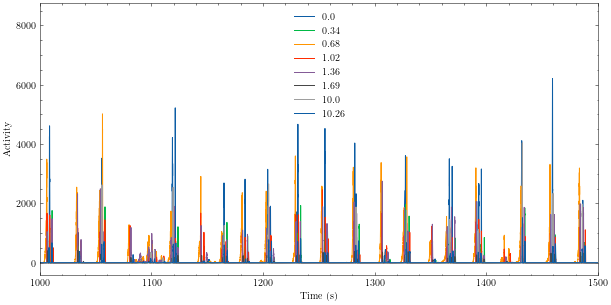

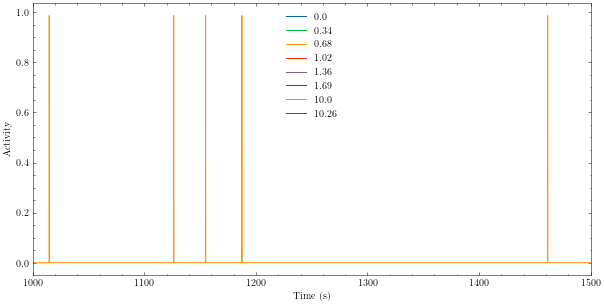

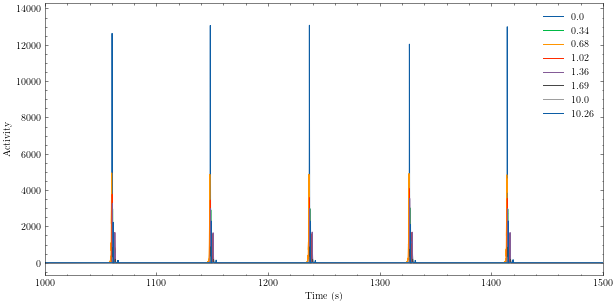

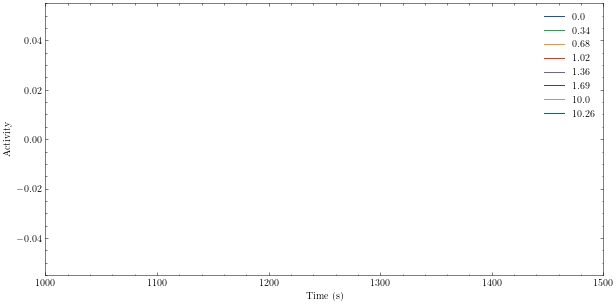

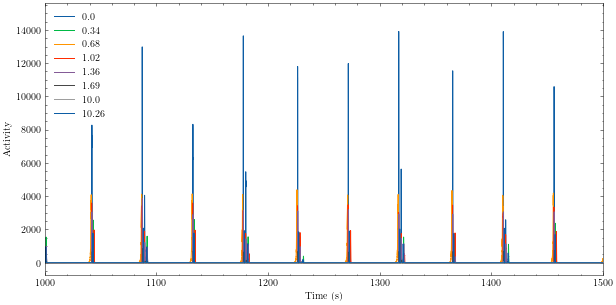

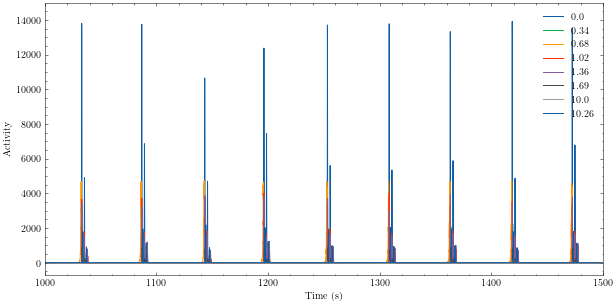

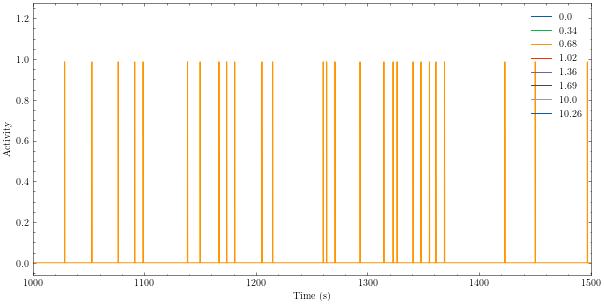

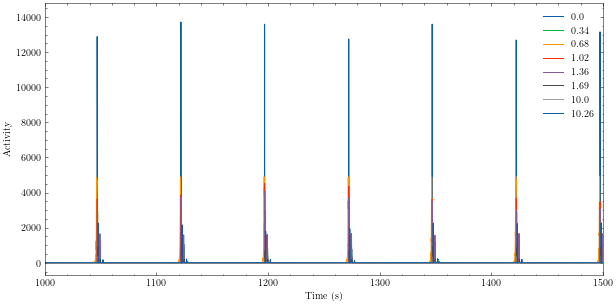

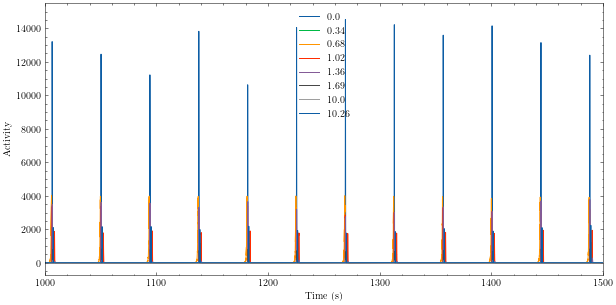

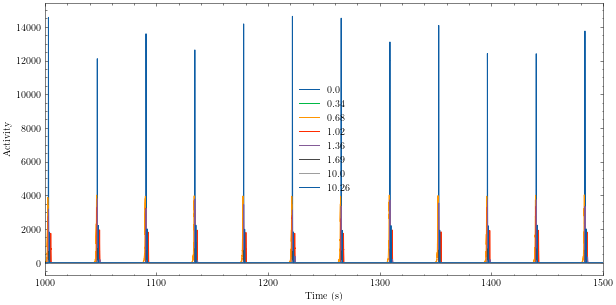

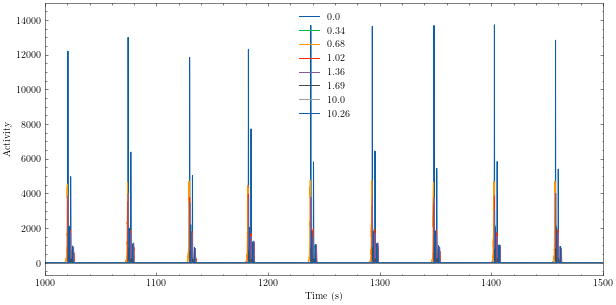

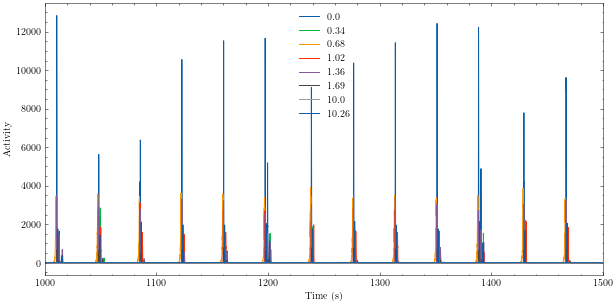

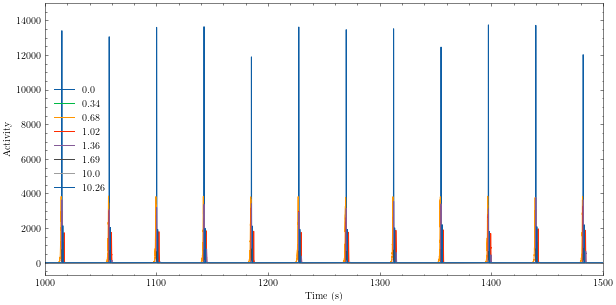

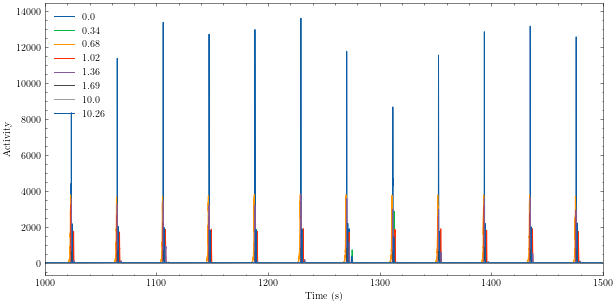

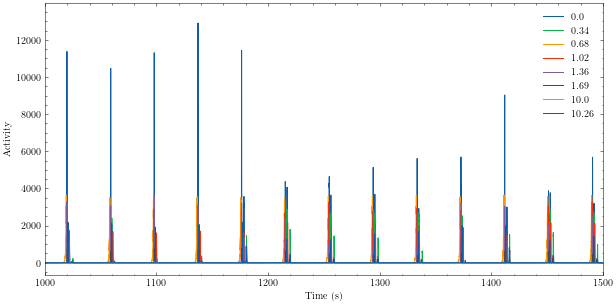

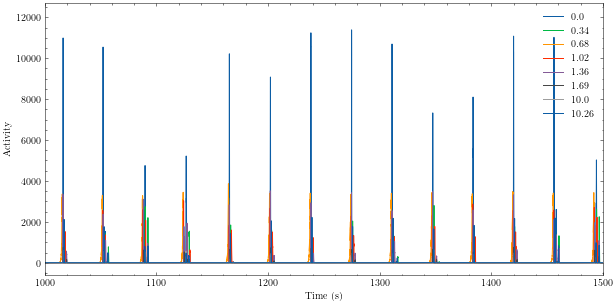

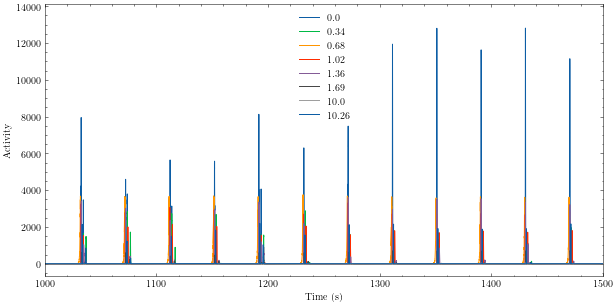

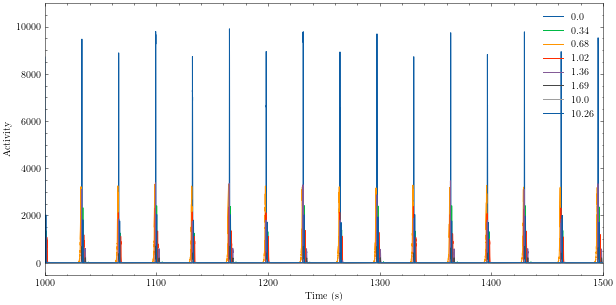

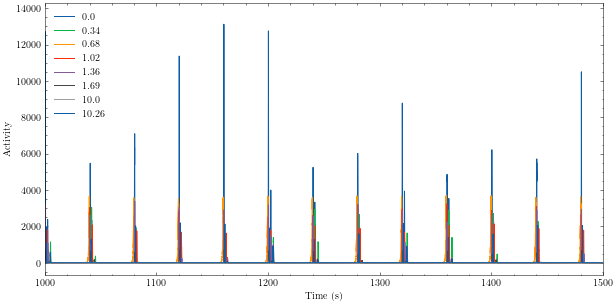

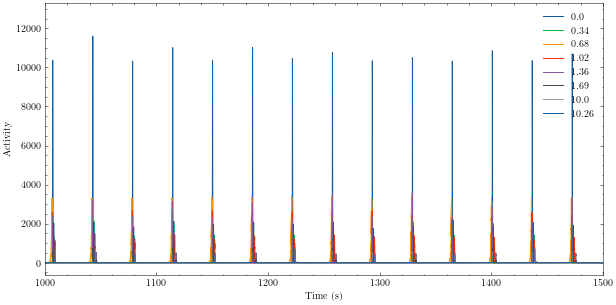

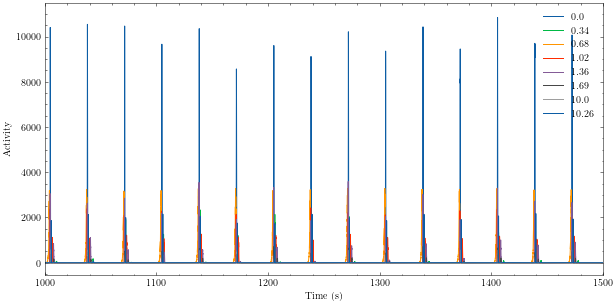

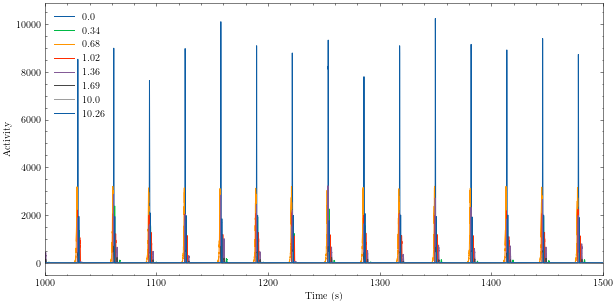

In [26]:
for j in range(len(list_dirs)):
    plt.figure(figsize=(10, 5))
    for i in range(num_pops):

        plt.plot(times[j][i][:], pop_activities[j][i][:], label=list_dirs[i])

    plt.xlabel('Time (s)')
    plt.ylabel('Activity')
    plt.legend()

    plt.xlim(1000,1500)
    plt.show()

